<a href="https://colab.research.google.com/github/PernasA/TP2_SOA/blob/master/HPC/Cuaderno_2_Martes_grupo6a_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### 1. Introducción

El Ejercicio 1 del TP3 tiene como objetivo tomar una imagen como entrada, aplicarle el algoritmo escala de imagen, y mostrar la imagen transformada.

El algoritmo "Escala de Imagen" se encarga de reducir el tamaño de la imagen. Su funcionamiento consiste en que cada píxel de salida se reemplaza por su píxel más cercano en la entrada. Se redondean las coordenadas a su entero más cercano. 

Vamos a ejecutar el algoritmo de manera secuencial, haciendo uso de la CPU; y luego haciendo uso de la GPU, con CUDA, realizando una ejecución paralela mediante threads. Una vez ejecutada la función en ambos casos, se mostrará la imagen mediante un plot.

### 2. Armado del ambiente


In [ ]:
#INSTALACION DE BIBLIOTECA 'PYCUDA'#
!pip install pycuda

     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 75 kB 4.3 MB/s 
     |████████████████████████████████| 66 kB 4.6 MB/s 
  Created wheel for pycuda: filename=pycuda-2021.1-cp37-cp37m-linux_x86_64.whl size=627365 sha256=91b84b55fe5009c3942165f5550e3ba481af094c980373eefa4abe5444ab64b9
  Stored in directory: /root/.cache/pip/wheels/c4/ef/49/dc6a5feb8d980b37c83d465ecab24949a6aa19458522a9e001
  Created wheel for pytools: filename=pytools-2021.2.9-py2.py3-none-any.whl size=62370 sha256=90f17ae12c344b07d5d26fca88ba036a7cbdaf62b1649fb667b610cf5d82a665
  Stored in directory: /root/.cache/pip/wheels/41/b9/6e/94bb014f6484b15ec77e7877f3a227609481ffd98db364504d
Successfully built pycuda pytools


In [ ]:
!pip install validators

### 3. Desarrollo
# CPU


--2021-11-13 20:53:44--  https://www.show.news/__export/1586216624761/sites/debate/img/2020/04/06/pinky_crop1586216591014.jpg_423682103.jpg
Resolving www.show.news (www.show.news)... 54.230.15.78, 54.230.15.9, 54.230.15.115, ...
Connecting to www.show.news (www.show.news)|54.230.15.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 110801 (108K) [image/jpeg]
Saving to: ‘imagen.jpg’

imagen.jpg          100%[===================>] 108.20K  --.-KB/s    in 0.04s   

2021-11-13 20:53:44 (2.71 MB/s) - ‘imagen.jpg’ saved [110801/110801]

Tiempo total de ejecucion:  22214.096 [ms]
Tiempo de procesamiento en CPU:  22095.64 [ms]


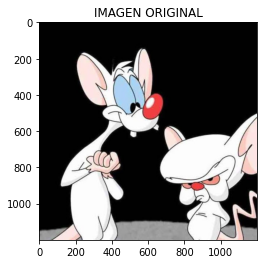

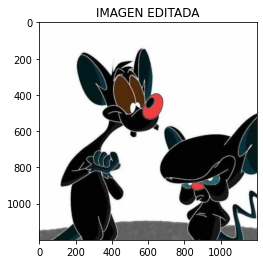

In [ ]:
try:
  #--------------------------------------BIBLIOTECAS--------------------------------------#
  import validators
  from PIL import Image
  import matplotlib.pyplot as plt
  from datetime import datetime
  import numpy
  import sys
  #-----------------------------------PARAMETRO IMAGEN------------------------------------#
  #@title Ingrese la url de una imagen:

  url_imagen = "https://www.show.news/__export/1586216624761/sites/debate/img/2020/04/06/pinky_crop1586216591014.jpg_423682103.jpg" #@param {type: "string" }
  Colores = 'Rojo' #@param ["Blanco", "Negro", "Rojo","Verde","Azul"]

  #Verificacion de que el usuario haya ingresado una URL de imagen valida
  if(url_imagen == "" or not validators.url(url_imagen)):
    raise TypeError("Debe ingresar la url de una imagen.")
  !wget {url_imagen} -O imagen.jpg

  #Defino los rangos de colores
  rango1 = [0,0,0]
  rango2 = [0,0,0] 
  if(Colores == 'Negro'):
    rango1 = [0,0,0]
    rango2 = [50,50,50]
  if(Colores == 'Blanco'):
    rango1 = [200,200,200]
    rango2 = [255,255,255]
  if(Colores == 'Rojo'):
    rango1 = [80,0,0]
    rango2 = [255,170,120]
  if(Colores == 'Azul'):
    rango1 = [0,0,80]
    rango2 = [125,175,255]
  if(Colores == 'Verde'):
    rango1 = [0,80,0]
    rango2 = [175,255,155]

  #Obtencion del tiempo inicial
  tiempo_total = datetime.now()

  #Declaracion de funcion que realiza el pasaje del tiempo obtenido mediante datetime.now(), a milisegundos.
  tiempo_en_ms = lambda dt:(dt.days * 24 * 60 * 60 + dt.seconds) * 1000 + dt.microseconds / 1000.0

  #---------------------------------------CODIGO--------------------------------------------#
  # Importación de la imagen y obtencion de sus dimensiones 
  imagen_normal_jpg = Image.open('imagen.jpg')
  width, height = imagen_normal_jpg.size
  
  #Convierto la imagen a array
  imagen_normal = numpy.asarray(imagen_normal_jpg)
  imagen_con_colores_nueva=numpy.empty_like(imagen_normal)

  #Ploteo de la imagen original
  plt.figure()
  plt.title("IMAGEN ORIGINAL")
  imgplot=plt.imshow( imagen_normal )

  #Obtencion del tiempo previo a la ejecucion en GPU
  tiempo_imagen_cpu = datetime.now()

  #Lleno cada pixel de la imagen creada
  for y in range(0,height):
      for x in range(0,width):
        pixel_R, pixel_G, pixel_B = imagen_normal[x][y]
        if(not(pixel_R >=rango1[0] and pixel_G >=rango1[1] and pixel_B  >=rango1[2] and pixel_R <= rango2[0] and 
            pixel_G <= rango2[1] and pixel_B  <= rango2[2])):
          imagen_con_colores_nueva[x][y] = [ 255 - pixel_R,  255 - pixel_G , 255 - pixel_B]
        else:
          imagen_con_colores_nueva[x][y] = [pixel_R, pixel_G , pixel_B]
  #Calculo del tiempo total de procesamiento de la imagen en GPU
  tiempo_imagen_cpu = datetime.now() - tiempo_imagen_cpu

  #Ploteo de la imagen resultado
  plt.figure()
  plt.title("IMAGEN EDITADA")
  imgplot=plt.imshow( imagen_con_colores_nueva )

  #Calculo del tiempo total de ejecucion del programa
  tiempo_total = datetime.now() - tiempo_total

  print("Tiempo total de ejecucion: ", tiempo_en_ms( tiempo_total ), "[ms]" )
  print("Tiempo de procesamiento en CPU: ", tiempo_en_ms( tiempo_imagen_cpu   ), "[ms]" )

except Exception as e:
  print("Error", e )
  sys.exit()

  
```
  %matplotlib inline
  import matplotlib.pyplot as plt
  import sys
  import numpy
  from PIL import Image 
  import pycuda.driver as cuda
  import pycuda.autoinit
  import functools
  from functools import reduce
  from pycuda.compiler import SourceModule
  rango1 = [0,0,0]
  rango2 = [255,255,255] 
  if(Colores == 'Gris'):
    rango1 = [120,120,120]
    rango2 = [190,190,190]
  if(Colores == 'Negro'):
    rango1 = [0,0,0]
    rango2 = [50,50,50]
  if(Colores == 'Blanco'):
    rango1 = [200,200,200]
    rango2 = [255,255,255]
  if(Colores == 'Rojo'):
    rango1 = [0,0,0]
    rango2 = [255,170,120]
  if(Colores == 'Azul'):
    rango1 = [0,0,0]
    rango2 = [125,175,255]
  if(Colores == 'Verde'):
    rango1 = [0,0,0]
    rango2 = [175,255,155]
    rango1 = [150,125,0]
    rango2 = [255,255,90]
  if(Colores == 'Gris'):
    rango1 = [200,0,85]
    rango2 = [255,235,250]

  img_nombre = 'imagen.png'
  image = Image.open( img_nombre )
  plt.figure()
  imgplot=plt.imshow(image)
  imgSmall = image.resize((NivelPixelado,NivelPixelado))


  result = imgSmall.resize(image.size,0)
  pixels = image.load()
  pixels2 = result.load()
  for i in range(image.size[0]):
    for j in range(image.size[1]):
      r,g,b = pixels[i,j]
      if(r >=rango1[0] and g >=rango1[1] and b >=rango1[2] and r <= rango2[0] and g <= rango2[1] and b <= rango2[2]):
        pixels[i,j] = pixels2[i,j]


```


```
# Invertir colores CPU
for y  in range( 0, img_alto ):
  for x in range( 0, img_ancho ):
#    print( x, y, img_pic_cpu[x][y] )
    pixel_R, pixel_G, pixel_B = img_O_cpu[x][y]
    img_R_cpu[x][y] = [ 255 - pixel_R,  255 - pixel_G , 255 - pixel_B]
```




# 4. Conclusiones

Observando las metricas, podemos concluir que el procesamiento de la imagen en GPU se realiza más rapido que en CPU, en promedio 2.840 veces más rapido. Esto se debe a que en GPU se realizan operaciones de manera paralela mientras que en CPU se realizan las operaciones de manera secuencial. En cuanto a la eficacia del algortimo, en CPU es mayor que en GPU debido a la disminucion de la precision de los valores de los pixeles. Se podria mejorar la eficacia del filtro en GPU utilizando distintas dimensiones y valores en la matriz kernel. También, es más dificil de implementar el algoritmo en GPU.

# 5. Bibliografía

[1] Algoritmo de escala - Towards data science: https://towardsdatascience.com/image-processing-image-scaling-algorithms-ae29aaa6b36c

[2] Algoritmo de escala: -OpenCV: https://docs.opencv.org/4.4.0/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d


[3] Cuda - Documentación Oficial Nvidia:  https://docs.nvidia.com/cuda/

[4] Python basico UNLaM: https://github.com/wvaliente/SOA_HPC/blob/main/Documentos/Python_Basico.ipynb
